In [1]:
from contours.data import Vertex

a = Vertex(0, 0)
b = Vertex(1, 0)

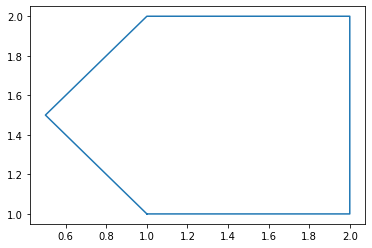

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show() # if you need...

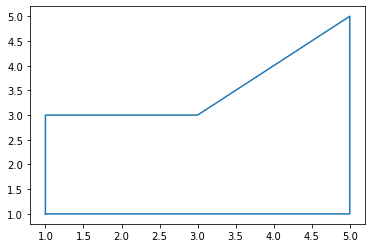

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

from contours.data import Vertex
from contours import Polyline

poly = Polyline()
poly.add_vertex(Vertex(1, 1))
poly.add_vertex(Vertex(5, 1))
poly.add_vertex(Vertex(5, 5))
poly.add_vertex(Vertex(3, 3))
poly.add_vertex(Vertex(1, 3))
poly.close()

fig, ax = plt.subplots()
ax.plot(*poly.verticies) 
plt.show()

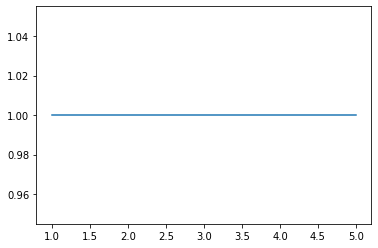

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from contours.data import Vertex, Edge

edge = Edge(Vertex(1, 1), Vertex(5, 1))

plt.figure()
plt.plot(*edge.verticies)
plt.show()

Vector(x=0.7071067811865475, y=-0.7071067811865475)
4.0 4.0 0.7071067811865475 -0.7071067811865475


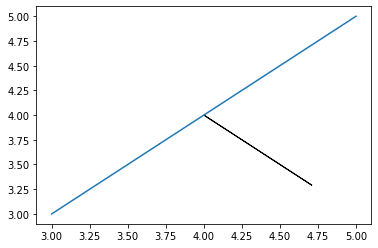

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from contours.data import Vertex, Edge, Vector, Direction

edge = Edge(Vertex(5, 5), Vertex(3, 3))
vector = edge.vector.get_perpendecular(1, Direction.CCW)

print(vector)

vec_vert = vector.verticies
vec_vert[0] += edge.get_middle_of(0.5).x
vec_vert[1] += edge.get_middle_of(0.5).y

fig, ax = plt.subplots()
ax.plot(*edge.verticies, label='y0')
ax.arrow(*vec_vert, label='y1')

print(*vec_vert)
plt.show()

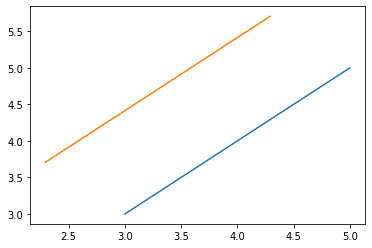

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

from contours.data import Vertex, Edge, Vector, Direction

edge = Edge(Vertex(5, 5), Vertex(3, 3))
vector = edge.vector.get_perpendecular(1)
vert1 = Vertex(x=edge.start.x + vector.x, y=edge.start.y + vector.y)
vert2 = Vertex(x=edge.end.x + vector.x, y=edge.end.y + vector.y)

new_edge = Edge(vert1, vert2)

fig, ax = plt.subplots()
ax.plot(*edge.verticies, label='y0')
ax.plot(*new_edge.verticies, label='y1')
plt.show()

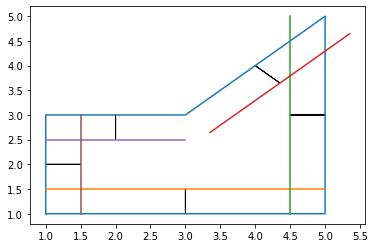

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from contours.data import Vertex, Direction
from contours import Polyline

poly = Polyline()
poly.add_vertex(Vertex(1, 1))
poly.add_vertex(Vertex(5, 1))
poly.add_vertex(Vertex(5, 5))
poly.add_vertex(Vertex(3, 3))
poly.add_vertex(Vertex(1, 3))
poly.close()

edges = poly.edges
perp_edges = list(map(lambda x: x.get_offset(.5, Direction.CCW), edges))

fig, ax = plt.subplots()
ax.plot(*poly.verticies)
for perp in perp_edges:
    ax.plot(*perp.verticies)

    # Draw vector arrow
    vector = perp.vector.get_perpendecular(.5, Direction.CW)

    vec_vert = vector.verticies
    vec_vert[0] += perp.get_middle_of(0.5).x
    vec_vert[1] += perp.get_middle_of(0.5).y

    ax.arrow(*vec_vert)

ax.xaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.autoscale(enable=True, axis="y", tight=False)
plt.show()